This document contains some QM group presentaion parts shown in below:
1. multiple linear regression - based on the traffic accident data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [3]:
# load the data
csv = pd.read_csv("./data/dft-road-casualty-statistics-accident-1979-2021.csv")

C:\Users\29425\AppData\Local\Temp\ipykernel_15384\2112012909.py:2: DtypeWarning: Columns (0,2,15,16,35) have mixed types. Specify dtype option on import or set low_memory=False.
  csv = pd.read_csv("./data/dft-road-casualty-statistics-accident-1979-2021.csv")


In [4]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703911 entries, 0 to 8703910
Data columns (total 36 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   accident_index                               object 
 1   accident_year                                int64  
 2   accident_reference                           object 
 3   location_easting_osgr                        float64
 4   location_northing_osgr                       float64
 5   longitude                                    float64
 6   latitude                                     float64
 7   police_force                                 int64  
 8   accident_severity                            int64  
 9   number_of_vehicles                           int64  
 10  number_of_casualties                         int64  
 11  date                                         object 
 12  day_of_week                                  int64  
 13  time        

In [5]:
csv.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [12]:
# build a model to predict the traffic accident
# base on the 1. road surface condition 2. weather condition 3. light condition 

sub_csv = csv[["accident_year", "light_conditions", "weather_conditions", "road_surface_conditions"]]
sub_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703911 entries, 0 to 8703910
Data columns (total 4 columns):
 #   Column                   Dtype
---  ------                   -----
 0   accident_year            int64
 1   light_conditions         int64
 2   weather_conditions       int64
 3   road_surface_conditions  int64
dtypes: int64(4)
memory usage: 265.6 MB


In [14]:
# reform the df to do dummy
sub_csv[["light_conditions", "weather_conditions", "road_surface_conditions"]] = sub_csv[["light_conditions", "weather_conditions", "road_surface_conditions"]].astype(object)

# get dummy
accident_numeric = pd.get_dummies(sub_csv)

accident_numeric.info()

C:\Users\29425\AppData\Local\Temp\ipykernel_15384\2260512607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_csv[["light_conditions", "weather_conditions", "road_surface_conditions"]] = sub_csv[["light_conditions", "weather_conditions", "road_surface_conditions"]].astype(object)
d:\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703911 entries, 0 to 8703910
Data columns (total 26 columns):
 #   Column                      Dtype
---  ------                      -----
 0   accident_year               int64
 1   light_conditions_-1         uint8
 2   light_conditions_1          uint8
 3   light_conditions_4          uint8
 4   light_conditions_5          uint8
 5   light_conditions_6          uint8
 6   light_conditions_7          uint8
 7   weather_conditions_-1       uint8
 8   weather_conditions_1        uint8
 9   weather_conditions_2        uint8
 10  weather_conditions_3        uint8
 11  weather_conditions_4        uint8
 12  weather_conditions_5        uint8
 13  weather_conditions_6        uint8
 14  weather_conditions_7        uint8
 15  weather_conditions_8        uint8
 16  weather_conditions_9        uint8
 17  road_surface_conditions_-1  uint8
 18  road_surface_conditions_1   uint8
 19  road_surface_conditions_2   uint8
 20  road_surface_conditions_

Text(0.5, 1.0, 'Correlation Matrix')

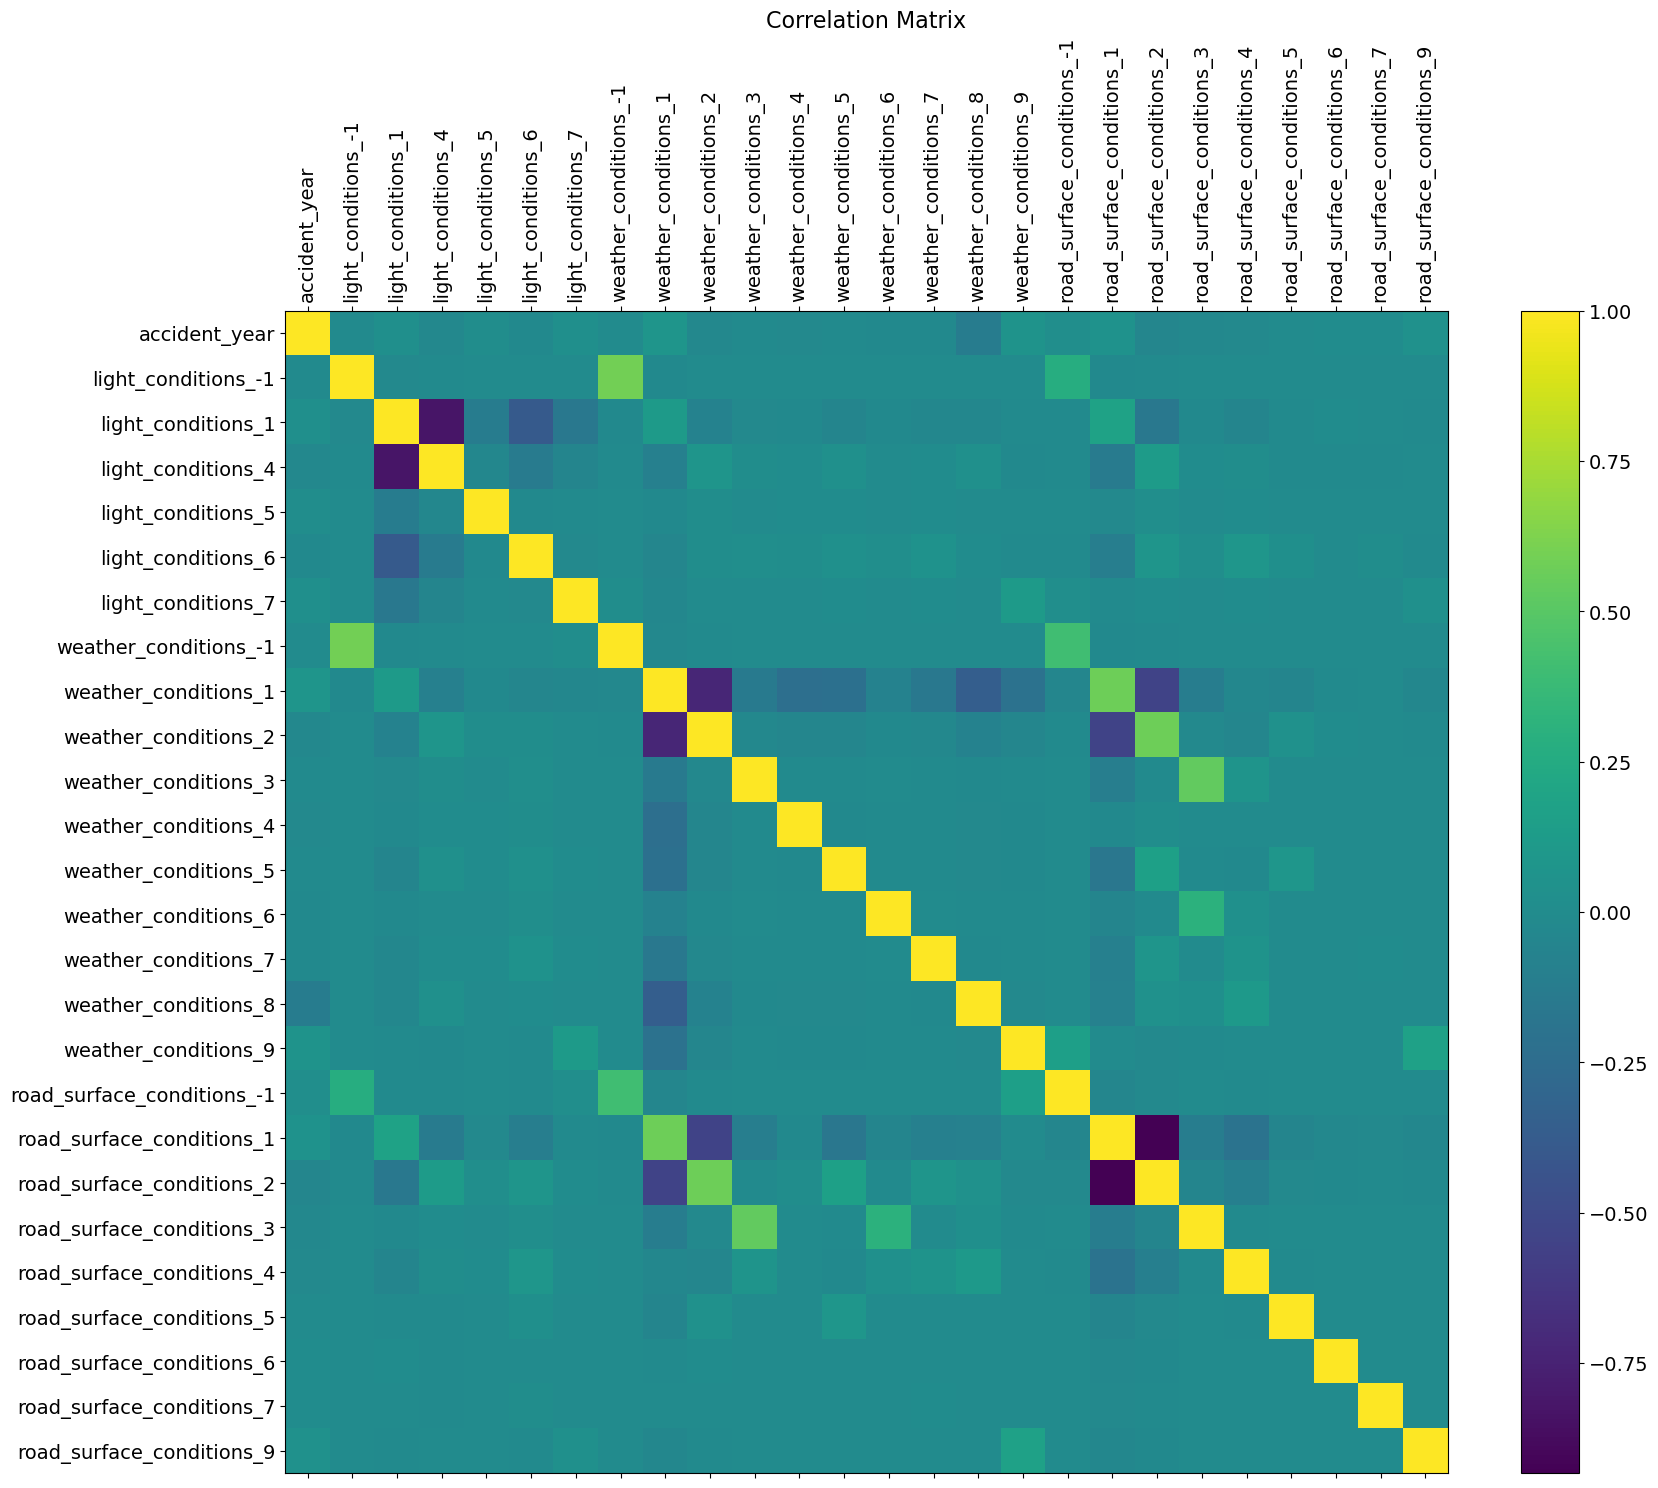

In [15]:
# draw the correalation matrix
df = accident_numeric
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)